# ENPH 213 - Week 9 Lab - Part 5

In this lab, we will be working on numerically solving ordinary differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab9-Part5, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 will be marked out of 5.

# Part 5

The Schroedinger equation for a particle in a box reduces to a relatively simple differential equation.

$\Large \frac{d^2 \phi}{dx^2} = (V-E) \phi$

Where the right hand side is simply a constant times $\phi$.  Note that for simplicity, I'm going to choose units such that $\hbar^2/2m = 1$.

There are 3 regions of interest, the quantum well that extends from $-L < x < L$ where the potential $V = 0$, and the regions $x \leq L$ and $x \geq L$ where $V = V$.  The difficulty is at the boundary where the values for $\phi(x)$ and $\phi^\prime(x)$ should be continuous.  With these three regions, the process to solve the provlem is to do each region separately and match them together.

We will this problem using the 2nd Order Central Difference solver discussed in class and used previously.  Note that with 2nd order ODEs, you need 2 initial conditions to get started. However, we do not know E, which will be solved for interatively. 

Use the following parameters in you solution. Use 1000 points stretching from -10 to 10.  The quantum well (where V = 0) will occupy from $-2 < x < 2$.  Outside of this region, the potential $ V = 30 $.

To start, run the algorithm from -10 to -2.  You will need 2 points to start so set the first two points of $\phi$ to be $\phi[0] = \phi[1] = 0.00001$. 

In the second step, run the algortithm backwards from 10 to 2 (in the right hand barrier).  Again, you will need 2 points to start so set the last two points of $\phi$ to be $\phi[-1] = \phi[-2] = 0.00001$.

The value for $E$ isn't critical in the barrier regions as it is much smaller than V.  You can set it to something small ($E=1$) for now.

To check your progress to this point, you should have exponentially decaying curves from 2 to 10 on either side.

For the middle, quantum well region, the result is only dependent on $E$ and is in fact negative because $V=0$.  Again you can use the 2nd Order Central difference solver.  This time, you can take the first 2 point to be the last 2 points of the first region below $x = -2$.  This will enforce continuity of the function and the slope.

The solution in the middle section is an oscillation.  The value of the ground state has $0 < E < 1$.  So, you need to guess a value for E, run the ODE solver, and then assess whether the value should of $E$ should be increased or decreased.  The assessment is whether the last point of the middle section is within a limit of the value at $x=2$ from the right hand barrier calculation.  This forces continuity of $\phi$.  $\phi^\prime$ is not necessarily continuous, but we will neglect that condition for simplicity.

For the iteration and assessment for $E$, I recommend using steps in $E$ of $\pm 0.0001$, and that $\phi(2) - \phi(2+h) < 0.001$, where $h$ is the distance between 2 points and $\phi(2+h)$ is the last point calcuted in the second step (right hand barrier).

Now that you have the ground state energy calculated (print this result), plot the result, which should show a central peak and a wave function exponentially decaying into the barriers.  Also, plot $\phi^2(x)$, which is the expectation value within the quantum well.

This is for the first energy level of the quantum well, $n=1$.  Solve the solution 4 more times for $n = 2, 3, 4, 5$.  For your initial guesses, remember than quantum well energies of excited states are $E(n) = n^2 E(1)$.  (Note that for $n=2, 4$, the middle section will end up negative.  To remedy this, make the points in the right hand barrier negative.)  Print the energies of these levels as well as the graphs for $\phi(x)$ and $\phi^2(x)$.

Finally, run your code with an initial guess of $E = 40$. Plot the result.  **Question:  Is this result consistent with the physics of the situation?**


E(1) = 0.521700
E(2) = 2.092500
E(3) = 4.729000
E(4) = 8.454500
E(5) = 13.294600
For initial guess E = 40 ||| E(7) = 26.417000


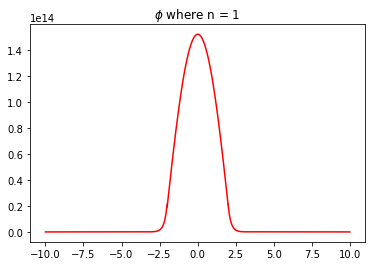

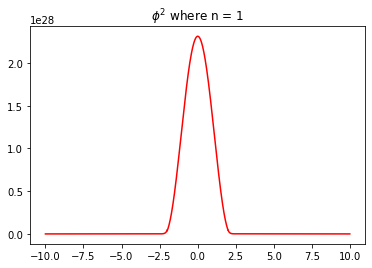

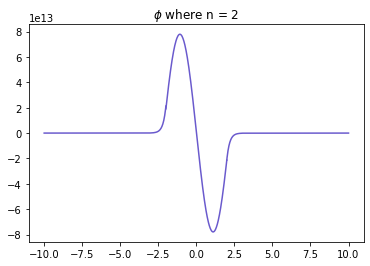

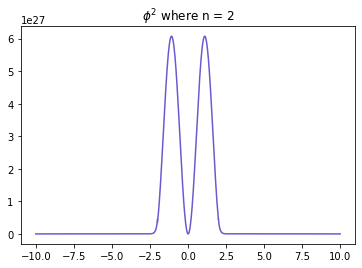

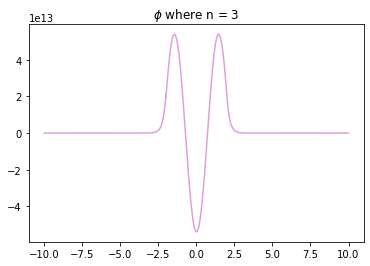

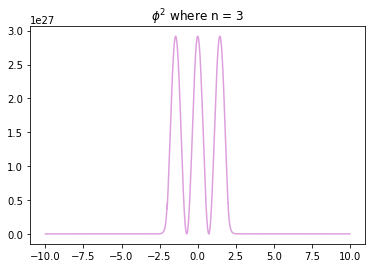

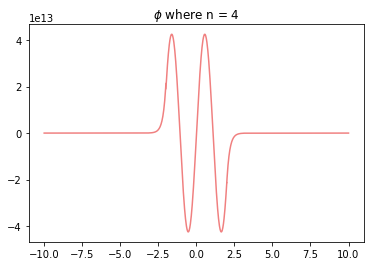

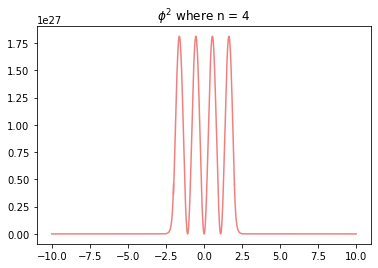

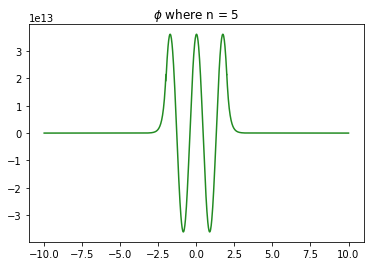

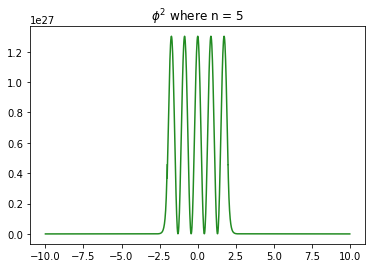

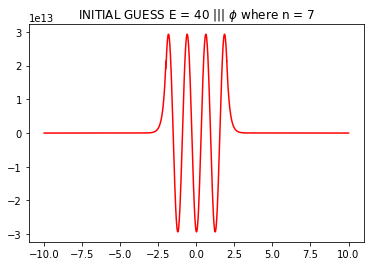

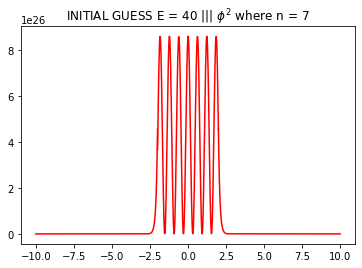

In [14]:
#DISCLAIMER: The E=40 Guess takes a bit of time to iterate. The graphs will only display after the iteration is done, so PLEASE BE PATIENT!! Tyty

#Libraires
import numpy as np
from matplotlib import pyplot as plt

#2nd Order Differential Equation solver
def ODE2F(func,N,yInit0,yInit1, xInit0, xN):
    #Return Arrays
    x = np.linspace(xInit0,xN,N)
    y = np.zeros(N)
    #Derivative
    yPrime = np.zeros(N)
    
    #Initialize
    y[0] = yInit0
    y[1] = yInit1
    
    #Step Size
    h = (xN-xInit0)/N
    
    yPrime[0] = (y[1]-y[0])/h
    
    #Loop thru rest of points
    for i in range(1,N-1):
        y[i+1]=func(x[i],y[i])*h**2 + 2*y[i] - y[i-1]
        
    return x,y

#Function to narrow down the E to the error condition.
def FindPerfectE(func,yInit0,yInit1,yN,EInit,N):
    #Make it agree with the ideal well E val
    E = N**2*EInit
    y = np.zeros(200)
    sig = (N%2)*2-1
    
    #While loop that ends when the error condition is met
    while (abs((y[-1]-yN*sig)/yN)>0.001):
        x,y = ODE2F(lambda x, phi: func(E,x,phi), 200, yInit0, yInit1, -2, 2)
        #Need to figure out if we should go up or down!
        if (y[-1] > yN):
            E += 0.0001*sig
        else:
            E -= 0.0001*sig
    
    return E

#Function that plots the curves with cool colours, and starts with a base guess
def PlotCurvesCool(N, fmt = 'r-', EInit0=0.5):
    #Function we want to use on outside well points
    f1 = lambda x, phi: (30-1)*phi
    
    fig, ax = plt.subplots()
    
    #Left side
    x,y = ODE2F(f1,400,1e-5,1e-5,-10,-2)
    ax.plot(x,y,fmt)
    
    #Right side
    x2,y2 = ODE2F(f1,400,1e-5,1e-5,10,2)
    ax.plot(x2,y2*((N%2)*2-1),fmt)
    
    #Function for inside the well
    f2 = lambda E, x, phi: -E*phi
    
    #Finding the proper E value
    E = FindPerfectE(f2,y[-2],y[-1],y2[-1],EInit0,N)
    
    #Plot inside points and give a title
    x3,y3 = ODE2F(lambda x,phi: f2(E,x,phi),200,y[-2],y[-1],-2,2)
    ax.plot(x3,y3,fmt)
    
    #If statement to print out alternate output for guess situation
    if (EInit0 == 40):
        ax.set_title("INITIAL GUESS E = 40 ||| $\phi$ where n = {:d}".format(7))
    else:
        ax.set_title("$\phi$ where n = {:d}".format(N))
    
    #Plot the squared expectation!
    fig,ax = plt.subplots()
    
    ax.plot(x,y**2,fmt)
    ax.plot(x2,y2**2,fmt)
    ax.plot(x3,y3**2,fmt)
    
    #If statement to print out alternate output for guess situation
    if(EInit0 == 40):
        ax.set_title("INITIAL GUESS E = 40 ||| $\phi^2$ where n = {:d}".format(7))
    
    else:
        ax.set_title("$\phi^2$ where n = {:d}".format(N))
    
    #Print the E value used!
    #If statement to print out alternate output for guess situation
    if (EInit0 == 40):
        print("For initial guess E = 40 ||| E({:d}) = {:f}".format(7,E))
    else:
        print("E({:d}) = {:f}".format(N,E))

#Time to plot w/ some cool colours
PlotCurvesCool(1)
PlotCurvesCool(2,'slateblue')
PlotCurvesCool(3,'plum')
PlotCurvesCool(4,'lightcoral')
PlotCurvesCool(5,'forestgreen')

#Plot the guessed value
PlotCurvesCool(1,'r-',40)
#Here, the result is not consistent with the physics, as the guess leads to a solution that is NOT n=1. This happens because the intial guess is between the two n values 7 and 8, meaning that the iteration function will lead to either an n value of 7 or 8! (In this case n=7)

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

My girlfriend picked the graph colours, which is why they are more appealing than the rest of the lab...